In [45]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [46]:
class Perception(object):
    """
    eta:学习率
    n_iter:权重向量的训练次数
    w_:神经分叉权重向量
    error_:用于记录神经元判断出错次数
    """
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        pass

    def fit(self, x, y):
        """
        输入训练数据，培训神经元，x输入样本向量，y对应样本分类

        x:shape[n_samples, n_features]
        x:[[1, 2, 3], [4, 5, 6]]
        n_samples:2
        n_features:3

        y:[1, -1]
        """

        """
        初始化权重向量为0
        加一是因为前面算法提到的w0，也就是步调函数的阈值
        """
        self.w_ = np.zeros(1 + x.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            """
            x:[[1, 2, 3], [4, 5, 6]]
            y:[1, -1]
            zip(x,y) = [[1, 2, 3, 1], [4, 5, 6, -1]]
            """
            for xi, target in zip(x, y):
                """
                update = η * (y - y')
                """
                update = self.eta * (target - self.predict(xi))
                """
                xi是一个向量
                update * xi 等价：
                [▽w[1]=x[1]*update,▽w[2]=x[2]*update,▽w[3]=x[3]*update]
                """
                self.w_[1:] += update * xi
                self.w_[0] += update

                errors += int(update != 0.0)
                self.errors_.append(errors)
                pass

            pass

        pass
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
        pass
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)
        pass


In [47]:
def show(x):
    plt.scatter(x[:50,0],x[:50,1],color='red',marker='o',label='setosa')
    plt.scatter(x[50:100,0],x[50:100,1],color='blue',marker='x',label='versicolor')  
    plt.xlabel('petal length')  
    plt.ylabel('petal width') 
    plt.legend(loc=2)  
    plt.show()  

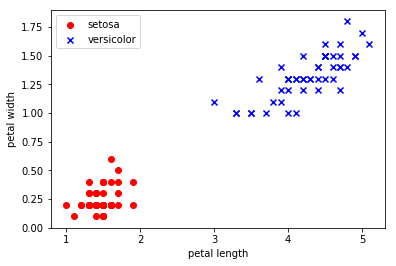

In [48]:
iris= datasets.load_iris()
x = iris.data[:100, 2:4] 
y=iris.target[:100]#取前100条数据
y = np.where(y == 0,-1,1) #标签改为-1/1
show(x)

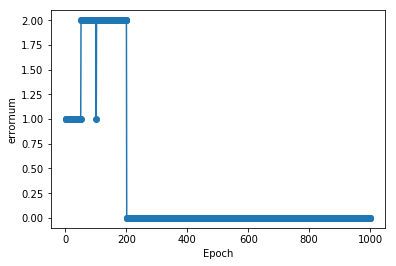

In [49]:
ppn = Perception(eta=0.1, n_iter=10)
ppn.fit(x, y)
plt.plot(range(1,len(ppn.errors_) + 1),ppn.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('errornum')
plt.show()

In [50]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x, y, classifier, resolution = 0.02):
    marker = ('s', 'x', 'o', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max()
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max()

    #print(x1_min, x1_max)
    #print(x2_min, x2_max)

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    #print(xx1.ravel())
    #print(xx2.ravel())
    #print(z)

    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0],y=x[y==cl, 1], alpha=0.8, c=cmap(idx), 
                    marker=marker[idx], label=cl)

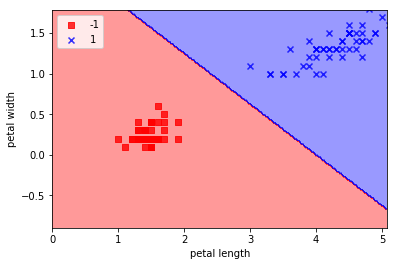

In [51]:
plot_decision_regions(x, y, ppn, resolution=0.02)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc =2)
plt.show()